<a href="https://colab.research.google.com/github/Yousufalipangat/Data-Science/blob/main/Case_Study_Retain_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Retain Customers Case study**

# Context

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs [IBM Sample Data Sets]

# Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

* Customers who left within the last month : the column is called Churn,

* Services that each customer has signed up for : phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

* Customer account information : how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers : gender, age range, and if they have partners and dependents


# What we are looking for?

1. How many customers are present in the dataset?
2. What is the distribution of gender among the customers?
3. How does age vary among the customers?
4. What are the different locations from which customers belong?
5. How long have customers been using the service on average?
6. What is the distribution of subscription types?
7. What is the average monthly charge incurred by customers?
8. What is the range of total charges accumulated by customers?
9. How many customers have churned?
10. What is the churn rate in the dataset?
11. How does churn vary across different genders?
12. Are there any differences in churn based on the customer's age?
13. Are customers from specific locations more likely to churn?
14. Does the subscription type influence customer churn?
15. Is there any correlation between monthly charges and total charges?




# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Primary Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# column name
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# understand total record count, unique values etc for each column

for column in df.columns:
  print("\033[0;34m Column Name : ",column,'\033[0m')
  print("Total record cound : ",df[column].count())
  print("Total unique records : ",df[column].nunique())
  print("Unique Values : " , np.sort(df[column].unique()))

  print()


 Column Name :  customerID 
Total record cound :  7043
Total unique records :  7043
Unique Values :  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

 Column Name :  gender 
Total record cound :  7043
Total unique records :  2
Unique Values :  ['Female' 'Male']

 Column Name :  SeniorCitizen 
Total record cound :  7043
Total unique records :  2
Unique Values :  [0 1]

 Column Name :  Partner 
Total record cound :  7043
Total unique records :  2
Unique Values :  ['No' 'Yes']

 Column Name :  Dependents 
Total record cound :  7043
Total unique records :  2
Unique Values :  ['No' 'Yes']

 Column Name :  tenure 
Total record cound :  7043
Total unique records :  73
Unique Values :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]

 Column Name :  PhoneService 
Total record cound : 

In [6]:
# from above we came to know total charges have space string values and the data type is object

df.loc[df["TotalCharges"] == " ",'TotalCharges'] = 0
# total charges changed to zero for whose tenure is zero
df["TotalCharges"] = df["TotalCharges"].astype(np.float32)

As per primary analysis, There is no direct null values in data set. But the " " values in totalcharges has been changed to 0 as tenure is zero.

# Check for outliers

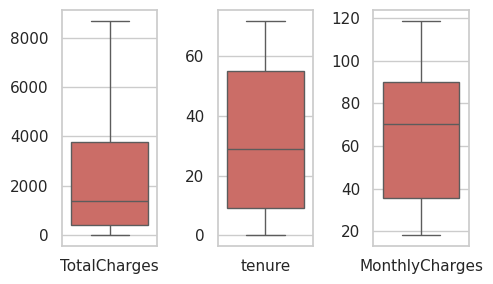

In [7]:
sns.set_theme(palette='hls',style='whitegrid')
fig, ax = plt.subplots(1,3,figsize=(5,3))

sns.boxplot(data= df[['TotalCharges']],ax=ax[0])
sns.boxplot(data= df[["tenure"]],ax=ax[1])
sns.boxplot(data= df[["MonthlyCharges"]],ax=ax[2])

plt.tight_layout()
plt.show()


* There seems no outliers found in the dataset



# Exploratory Data Analysis

In [8]:
df["customerID"].count()

7043

We have 7043 custmores in the dataset

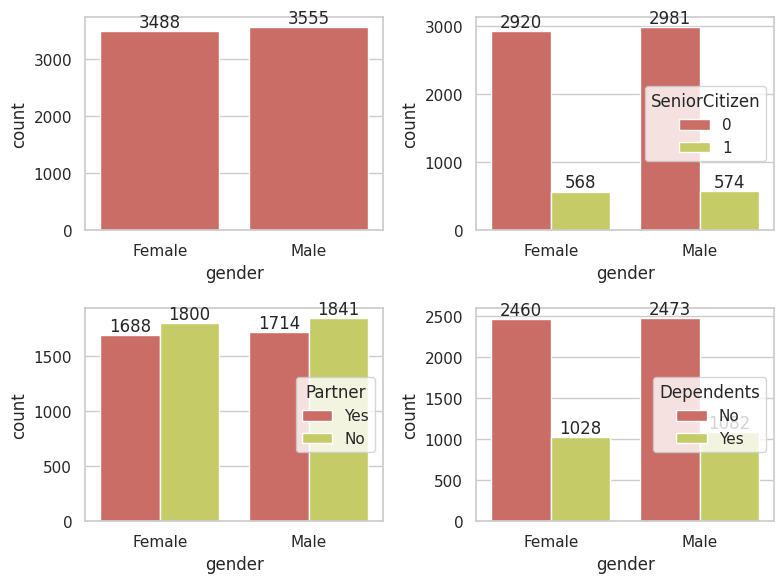

In [9]:

fig , ax = plt.subplots(nrows = 2,ncols =2,figsize=(8,6))
plot1 = sns.countplot(data=df,x='gender', ax= ax[0,0],)
plot1.bar_label(plot1.containers[0])

plot2 = sns.countplot(data=df, x='gender',hue='SeniorCitizen', ax = ax[0,1] , legend = 'full')
plot2.bar_label(plot2.containers[0])
plot2.bar_label(plot2.containers[1])
plot2.legend(title="SeniorCitizen",loc='center right')

plot3 = sns.countplot(data=df, x='gender',hue='Partner', ax = ax[1,0] )
plot3.bar_label(plot3.containers[0])
plot3.bar_label(plot3.containers[1])
plot3.legend(title="Partner",loc='center right')

plot4 = sns.countplot(data=df, x='gender',hue='Dependents', ax = ax[1,1])
plot4.bar_label(plot4.containers[0])
plot4.bar_label(plot4.containers[1])
plot4.legend(title="Dependents",loc='center right')
plt.tight_layout()
plt.show()



*   The gender all over distribution is approximately equal, ie 3488 female annd 3555 males
*   In both gender, most customers are senior citizens
*   In both gender, most customers have no dependents



In [10]:
df.tenure.mean()

32.37114865824223

* In an avergae customers are using the service for 32.4 months.

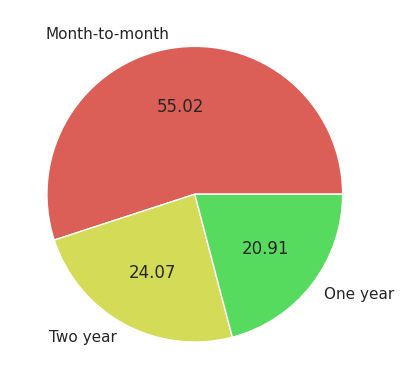

In [11]:
plt.pie(x=df.Contract.value_counts(), labels = df.Contract.value_counts().index, autopct=lambda x: "{:.2f}".format(round(x,2)))
plt.show()

* 55.02 % customers are opting month-to-month contract, 24.07 % and 20.91 % are for two year and one year contract respectively.
* Customers are very much found of month-to-month contract.


In [12]:
df.MonthlyCharges.mean()

64.76169246059918

* The average monthly charges incured is 64 $.

In [13]:
print(df.TotalCharges.min())
print(df.TotalCharges.max())


0.0
8684.8


* 0 is the min charge and 8684 is maximum charged incured from customers with in this dataset

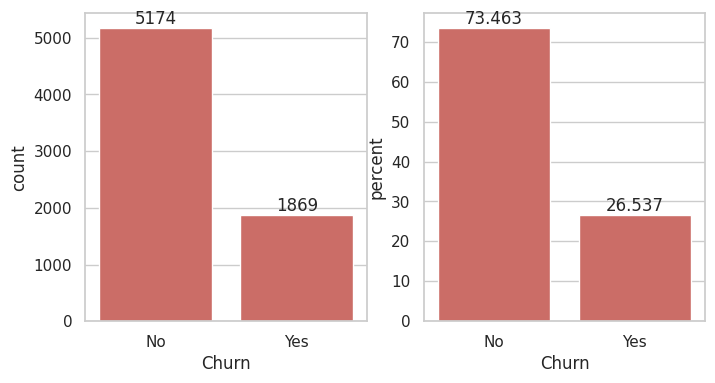

In [14]:
fig , ax = plt.subplots(1,2,figsize=(8,4))
plot = sns.countplot(data=df, x ='Churn' , ax = ax[0] )
plot.bar_label(plot.containers[0])

plot = sns.countplot(data=df, x ='Churn', stat='percent', ax= ax[1])
plot.bar_label(plot.containers[0])

plt.show()

* Data says around 26.5 % customers are churned, ie 1869 customers.

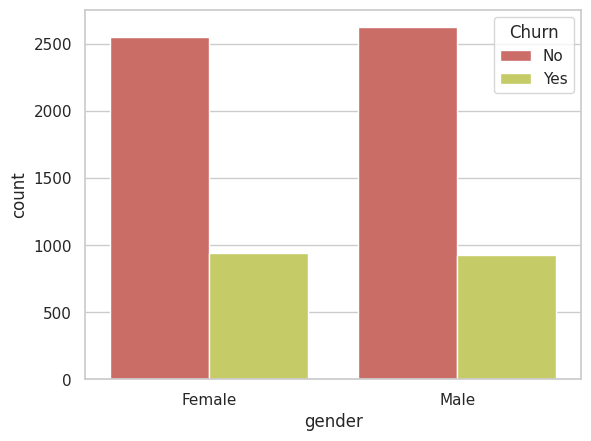

In [15]:
plot = sns.countplot(data=df, x ='gender' , hue ='Churn')
plot.bar_label
plt.show()


<Axes: xlabel='Contract', ylabel='count'>

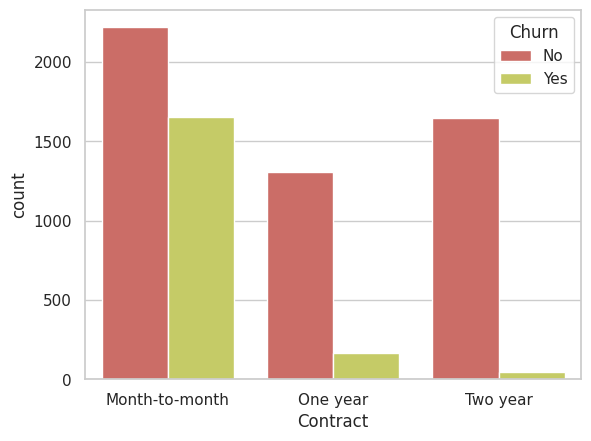

In [16]:
sns.countplot(data=df , x = 'Contract' , hue = 'Churn')

* we can infer from above graph that the churn is more under month-to-month contract. And other two contract has very low rate of churn.

Is there any correlation between monthly charges and total charges?

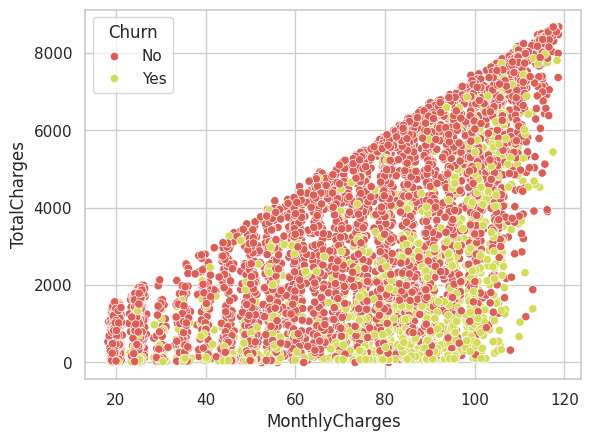

In [17]:

sns.scatterplot(data=df, x = 'MonthlyCharges', y = 'TotalCharges', hue='Churn')
plt.show()

* Total charge is increasing when monthly charge get increased

<ipython-input-128-cf2a30dca424>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
<ipython-input-128-cf2a30dca424>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
<ipython-input-128-cf2a30dca424>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
<ipython-input-128-cf2a30dca424>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
<ipython-input-128-cf2a30dca424>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
<ipython-input-128-cf2a30dca424>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_x

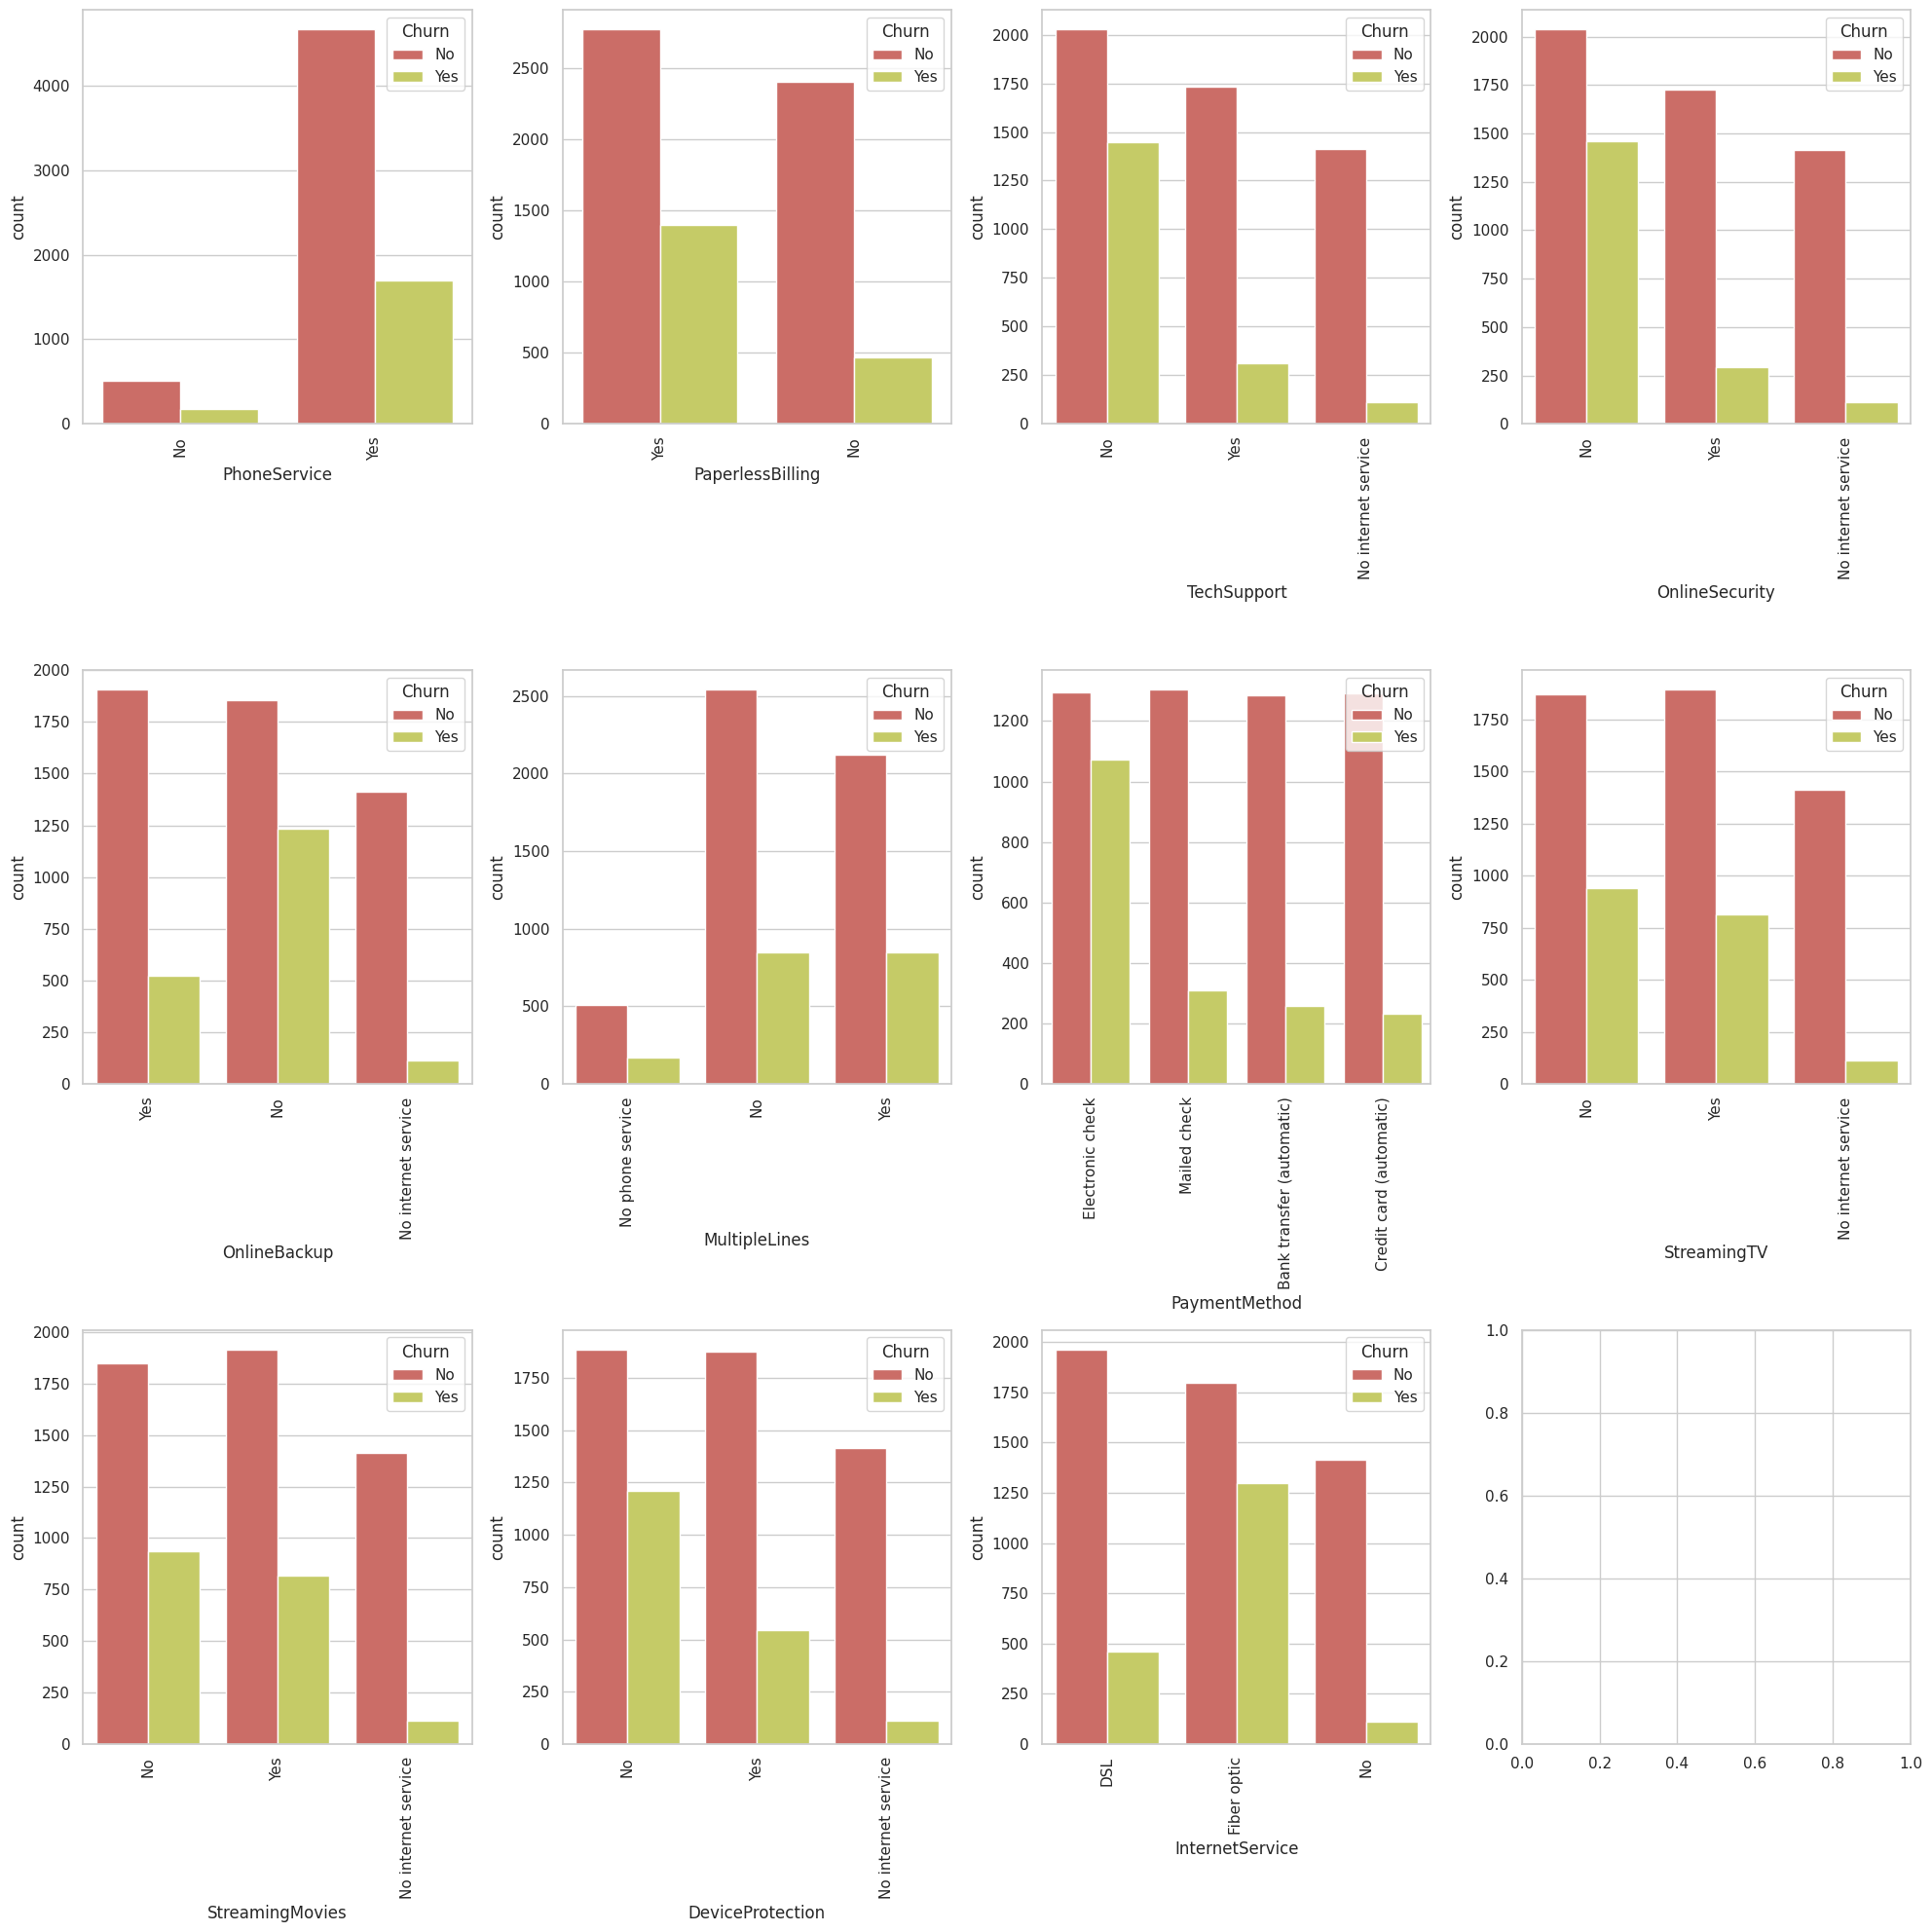

In [128]:
# how services impacting churn

services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod']

fig , ax = plt.subplots(3,4, figsize=(20,20))
for index,service in enumerate(services):
  plot = sns.countplot(data=df, x = service , ax = ax[index%3,index%4], hue = 'Churn')

  plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()